In [1]:
import os 
import pandas as pd
import numpy as np

## 1. Dataset Selection and Framing

In [2]:
### Dataset description (rows, columns, variable types) and key variables
communes = pd.read_csv("../Data/ofgl-base-communes.csv", delimiter=";", low_memory=False)
communes["type"] = "commune"
departements = pd.read_csv("../Data/ofgl-base-departements.csv", delimiter=";", low_memory=False)
departements["type"] = "departement"
regions = pd.read_csv("../Data/ofgl-base-regions.csv", delimiter=";", low_memory=False)
regions["type"] = "region"

### Context

Ce projet vise à analyser les finances locales des collectivités françaises (communes, départements, régions) à partir des données publiques de la Direction Générale des Finances Publiques (DGFiP).
L’objectif global est de mieux comprendre la répartition des ressources financières, les disparités territoriales et les tendances budgétaires à travers différents niveaux d’administration.

Les données proviennent de trois jeux principaux :
- **Communes** : informations budgétaires détaillées par commune (recettes, dépenses, population, etc.)
- **Départements** : données agrégées par département
- **Régions** : budgets régionaux consolidés

Cette analyse permet de répondre à des problématiques de gouvernance locale, d’équité territoriale et de planification financière publique.


### Dataset description (rows, columns, variable types) and key variables

#### Communes description

In [3]:
print("Shape:", communes.shape)
communes.head(5)

Shape: (3887010, 43)


,Exercice,Outre-mer,Code Insee 2024 Région,Nom 2024 Région,Code Insee 2024 Département,Nom 2024 Département,Code Siren 2024 EPCI,Nom 2024 EPCI,Strate population 2024,Commune rurale,...,ordre_analyse2_section1,ordre_analyse2_section2,ordre_analyse2_section3,ordre_analyse3_section1,ordre_analyse3_section2,ordre_analyse3_section3,ordre_analyse4_section1,annee_join,Population totale du dernier exercice,type
0,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1505.0,commune
1,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1505.0,commune
2,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1505.0,commune
3,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1505.0,commune
4,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,1505.0,commune


In [4]:
communes.dtypes

Exercice                                   int64
Outre-mer                                 object
Code Insee 2024 Région                     int64
Nom 2024 Région                           object
Code Insee 2024 Département               object
Nom 2024 Département                      object
Code Siren 2024 EPCI                     float64
Nom 2024 EPCI                             object
Strate population 2024                     int64
Commune rurale                            object
Commune de montagne                       object
Commune touristique                       object
Tranche revenu par habitant                int64
Présence QPV                              object
Code Insee 2024 Commune                   object
Nom 2024 Commune                          object
Catégorie                                 object
Code Siren Collectivité                    int64
Code Insee Collectivité                   object
Siret Budget                               int64
Libellé Budget      

ofgl-base-communes.csv

**Rows** : 3 887 010

**Columns** : 43

**Types de variables** : object, int64, float64

**Colonnes clés** :
- **Code Insee 2024 Commune** : identifiant unique de chaque commune.
- **Nom 2024 Commune** : nom de la commune pour lisibilité et visualisations.
- **Code Siren 2024 EPCI** : identifiant de l’EPCI, permet de regrouper les communes.
- **Montant / Montant en millions** : montants totaux des recettes ou dépenses.
- **Montant en € par habitant** : indicateur relatif pour comparer les communes de tailles différentes.
- **Population totale** : pour calculer des ratios et analyser les disparités.
- **Type de budget** : principal ou annexe, pour différencier les dépenses et recettes.
- **Rural / urbain, Commune de montagne, Commune touristique, Présence QPV** : caractéristiques socio-territoriales pour analyser les disparités.
- **Exercice / annee_join** : pour étudier les tendances dans le temps.

#### Departement description

In [5]:
print("Shape:", departements.shape)
departements.head(5)

Shape: (290281, 35)


,Exercice,Outre-mer,Code Insee 2024 Région,Nom 2024 Région,Strate population 2024,Rural / urbain,Code Insee 2024 Département,Nom 2024 Département,Catégorie,Code Siren Collectivité,...,ordre_analyse2_section3,ordre_analyse3_section1,ordre_analyse3_section2,ordre_analyse3_section3,ordre_analyse4_section1,annee_join,Population totale du dernier exercice,Population municipale,Montant en € par habitant (population municipale),type
0,2020,Non,84,Auvergne-Rhône-Alpes,2,rural,01,Ain,DEPT,220100010,...,NaN,NaN,NaN,NaN,NaN,2020,663720,643350,1.386116,departement
1,2020,Non,84,Auvergne-Rhône-Alpes,2,rural,01,Ain,DEPT,220100010,...,NaN,NaN,NaN,NaN,NaN,2020,663720,643350,0.000000,departement
2,2020,Non,32,Hauts-de-France,2,rural,02,Aisne,DEPT,220200026,...,NaN,NaN,NaN,NaN,NaN,2020,545353,534490,50.825955,departement
3,2020,Non,32,Hauts-de-France,2,rural,02,Aisne,DEPT,220200026,...,NaN,NaN,NaN,NaN,NaN,2020,545353,534490,116.362226,departement
4,2020,Non,84,Auvergne-Rhône-Alpes,1,rural,03,Allier,DEPT,220300016,...,NaN,NaN,NaN,NaN,NaN,2020,346156,337988,1.195265,departement


In [6]:
departements.dtypes

Exercice                                               int64
Outre-mer                                             object
Code Insee 2024 Région                                 int64
Nom 2024 Région                                       object
Strate population 2024                                 int64
Rural / urbain                                        object
Code Insee 2024 Département                           object
Nom 2024 Département                                  object
Catégorie                                             object
Code Siren Collectivité                                int64
Siret Budget                                           int64
Libellé Budget                                        object
Type de budget                                        object
Nomenclature                                          object
Agrégat                                               object
Montant                                              float64
Montant en millions     

ofgl-base-departements.csv

**Rows** : 290 281

**Columns** : 35

**Types de variables** : object, int64, float64

**Colonnes clés** :
- **Code Insee 2024 Département, Nom 2024 Département** : identifiants et noms des départements.
- **Montant / Montant en millions / Montant en € par habitant** : indicateurs financiers principaux.
- **Population totale** : pour normaliser et comparer les budgets.
- **Type de budget** : principal ou annexe.
- **Exercice** : pour analyser les évolutions dans le temps.

#### **Régions description**

In [7]:
print("Shape:", regions.shape)
regions.head(5)

Shape: (22933, 31)


,Exercice,Outre-mer,CTU ou Collectivité de Corse,Code Insee 2024 Région,Nom 2024 Région,Catégorie,Code Siren Collectivité,Siret Budget,Libellé Budget,Type de budget,...,ordre_analyse2_section2,ordre_analyse2_section3,ordre_analyse3_section1,ordre_analyse3_section2,ordre_analyse3_section3,ordre_analyse4_section1,annee_join,Population municipale,Montant en € par habitant (population municipale),type
0,2021,Non,Non,93,Provence-Alpes-Côte d'Azur,REG,231300021,23130002100012,REG PROVENCE-ALPES-COTE-D'AZUR,Budget principal,...,3.0,NaN,NaN,NaN,NaN,NaN,2021,5052832,39.320328,region
1,2021,Non,Non,93,Provence-Alpes-Côte d'Azur,REG,231300021,23130002100012,REG PROVENCE-ALPES-COTE-D'AZUR,Budget principal,...,NaN,NaN,3.0,NaN,NaN,NaN,2021,5052832,27.620849,region
2,2021,Non,Non,93,Provence-Alpes-Côte d'Azur,REG,231300021,23130002100038,BA AEROPORT D'AVIGNON,Budget annexe,...,NaN,NaN,3.0,NaN,NaN,NaN,2021,5052832,0.030988,region
3,2021,Non,Non,93,Provence-Alpes-Côte d'Azur,REG,231300021,23130002100038,BA AEROPORT D'AVIGNON,Budget annexe,...,NaN,NaN,NaN,2.0,NaN,NaN,2021,5052832,0.356865,region
4,2021,Non,Non,27,Bourgogne-Franche-Comté,REG,200053726,20005372600028,REGION BOURGOGNE FRANCHE COMTE,Budget principal,...,NaN,NaN,NaN,NaN,NaN,1.0,2021,2807807,390.537627,region


In [8]:
regions.dtypes

Exercice                                               int64
Outre-mer                                             object
CTU ou Collectivité de Corse                          object
Code Insee 2024 Région                                 int64
Nom 2024 Région                                       object
Catégorie                                             object
Code Siren Collectivité                                int64
Siret Budget                                           int64
Libellé Budget                                        object
Type de budget                                        object
Nomenclature                                          object
Agrégat                                               object
Montant                                              float64
Montant en millions                                  float64
Population totale                                      int64
Montant en € par habitant                            float64
code_type_budget        

ofgl-base-regions.csv

**Rows** : 22 933

**Columns** : 31

**Types de variables** : object, int64, float64

**Colonnes clés** :
- **Code Insee 2024 Région, Nom 2024 Région** : identifiants et noms des régions.
- **Montant / Montant en millions / Montant en € par habitant** : indicateurs financiers principaux.
- **Population totale** : pour calculs relatifs et comparaisons.
- **Type de budget** : principal ou annexe.
- **Exercice** : pour suivre les tendances temporelles.

### Analytical objectives (3–5)

Analyser la répartition des ressources financières des collectivités locales (communes, départements, régions) sur plusieurs exercices, en identifiant les montants totaux et par habitant.

Étudier les disparités territoriales selon la taille de la population, la ruralité/urbanité, et les caractéristiques socio-économiques des communes.

Identifier les tendances et anomalies dans les budgets (recettes et dépenses), y compris les variations anormales ou incohérentes d’une année sur l’autre.

Comparer les performances financières des différents types de budget (principal vs. annexe) et des structures administratives (communes, EPCI, départements, régions).

Fournir des insights pour la prise de décision publique, notamment sur la répartition des ressources et la planification budgétaire.

Évaluer l’impact de certaines caractéristiques territoriales sur les budgets, par exemple : l’influence de la présence de QPV (Quartiers Prioritaires de la Ville), du tourisme, ou du statut de commune de montagne sur les recettes et dépenses, afin de mieux comprendre les facteurs qui expliquent les variations financières entre collectivités.

### Business questions (3–5)

Quelles collectivités dépensent ou reçoivent le plus par habitant ?
→ (liée à l’objectif 1)

Comment les budgets ont-ils évolué entre 2020 et 2024 selon le type de collectivité ?
→ (liée à l’objectif 3)

Existe-t-il des disparités marquées entre communes rurales et urbaines ?
→ (liée à l’objectif 2)

Quels EPCI ou communes présentent des variations budgétaires anormales d’une année sur l’autre ?
→ (liée à l’objectif 3)

Quels indicateurs financiers peuvent servir de référence (KPI) pour suivre la santé budgétaire d’un territoire ?
→ (liée à l’objectif 4 & 5)

Les caractéristiques territoriales (ex. tourisme, QPV, montagne) influencent-elles significativement les montants budgétaires ?
→ (liée à l’objectif 6)

### Technical constraints (missing values, formats, etc.)

#### Valeurs manquantes / formats / doublons communes

In [9]:
communes.isna().sum()

Exercice                                       0
Outre-mer                                      0
Code Insee 2024 Région                         0
Nom 2024 Région                                0
Code Insee 2024 Département                    0
Nom 2024 Département                           0
Code Siren 2024 EPCI                        1398
Nom 2024 EPCI                               1398
Strate population 2024                         0
Commune rurale                                 0
Commune de montagne                            0
Commune touristique                            0
Tranche revenu par habitant                    0
Présence QPV                                   0
Code Insee 2024 Commune                        0
Nom 2024 Commune                               0
Catégorie                                      0
Code Siren Collectivité                        0
Code Insee Collectivité                        0
Siret Budget                                   0
Libellé Budget      

In [10]:
communes = communes.drop(columns = "ordre_analyse1_section1")
communes = communes.drop(columns = "ordre_analyse1_section2")
communes = communes.drop(columns = "ordre_analyse1_section3")
communes = communes.drop(columns = "ordre_analyse2_section1")
communes = communes.drop(columns = "ordre_analyse2_section2")
communes = communes.drop(columns = "ordre_analyse2_section3")
communes = communes.drop(columns = "ordre_analyse3_section1")
communes = communes.drop(columns = "ordre_analyse3_section2")
communes = communes.drop(columns = "ordre_analyse3_section3")
communes = communes.drop(columns = "ordre_analyse4_section1")

In [11]:
communes.isna().sum()

Exercice                                    0
Outre-mer                                   0
Code Insee 2024 Région                      0
Nom 2024 Région                             0
Code Insee 2024 Département                 0
Nom 2024 Département                        0
Code Siren 2024 EPCI                     1398
Nom 2024 EPCI                            1398
Strate population 2024                      0
Commune rurale                              0
Commune de montagne                         0
Commune touristique                         0
Tranche revenu par habitant                 0
Présence QPV                                0
Code Insee 2024 Commune                     0
Nom 2024 Commune                            0
Catégorie                                   0
Code Siren Collectivité                     0
Code Insee Collectivité                     0
Siret Budget                                0
Libellé Budget                              0
Type de budget                    

In [12]:
communes["Nom 2024 EPCI"] = communes["Nom 2024 EPCI"].fillna("Aucun Nom 2024 EPCI")

Certaines communes insulaires (comme Île-de-Bréhat dans les Côtes-d’Armor ou Ouessant dans le Finistère) présentent des valeurs manquantes pour Code Siren 2024 EPCI.
Cela reflète leur non-appartenance à un EPCI à fiscalité propre pour les exercices considérés, du fait de leur statut insulaire et administratif particulier.

Ces valeurs manquantes ont un sens réel, pas une erreur :

Elles indiquent l’absence d’appartenance à un EPCI (structure intercommunale).

C’est une information administrative pertinente, notamment pour l’analyse territoriale.

Supprimer ces lignes fausserait ton analyse :

Tu éliminerais certaines communes insulaires ou spécifiques, donc ta base ne représenterait plus fidèlement la France entière.

Cela biaiserait toute analyse géographique, budgétaire ou populationnelle.

In [13]:
colonnes_a_remplir = [
    "Code Siren 2024 EPCI",
    "Montant en € par habitant",
    "Montant en millions",
    "Population totale",
    "Compte 2024 Disponible",
    "code_type_budget",
    "annee_join",
    "Population totale du dernier exercice"
]

for col in colonnes_a_remplir:
    communes.loc[communes[col].isna(), col] = 0


Une seule ligne (Saint-Martin-de-Seignanx) présente des valeurs manquantes pour certaines colonnes budgétaires et populationnelles. Ces valeurs sont conservées car elles reflètent une situation réelle de budget annexe ou de compte comptable spécifique.

Concernant les autres valuers nulles :

Supprimer la colonne ou la ligne fausserait les résultats et les visualisations.

Même si certaines valeurs sont manquantes, la ligne contient toujours des informations utiles comme la commune, le département, le budget.

In [14]:
communes.head()

,Exercice,Outre-mer,Code Insee 2024 Région,Nom 2024 Région,Code Insee 2024 Département,Nom 2024 Département,Code Siren 2024 EPCI,Nom 2024 EPCI,Strate population 2024,Commune rurale,...,Agrégat,Montant,Montant en millions,Population totale,Montant en € par habitant,Compte 2024 Disponible,code_type_budget,annee_join,Population totale du dernier exercice,type
0,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,Recettes d'investissement,72519.07,0.072519,1490.0,48.670517,1.0,1.0,2017.0,1505.0,commune
1,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,Recettes d'investissement,74026.99,0.074027,1490.0,49.682544,1.0,3.0,2017.0,1505.0,commune
2,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,Recettes d'investissement,0.00,0.000000,1490.0,0.000000,1.0,3.0,2017.0,1505.0,commune
3,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,Recettes d'investissement,0.00,0.000000,1490.0,0.000000,1.0,3.0,2017.0,1505.0,commune
4,2017,Non,75,Nouvelle-Aquitaine,17,Charente-Maritime,241700517.0,Communauté de communes Cœur de Saintonge,3,Oui,...,Recettes d'investissement,0.00,0.000000,1490.0,0.000000,1.0,3.0,2017.0,1505.0,commune


In [15]:
communes["Code Siren 2024 EPCI"] = communes["Code Siren 2024 EPCI"].astype(int)
communes["annee_join"] = communes["annee_join"].astype(int)
communes["Population totale"] = communes["Population totale"].astype(int)
communes["Population totale du dernier exercice"] = communes["Population totale du dernier exercice"].astype(int)
communes["Compte 2024 Disponible"] = communes["Compte 2024 Disponible"].astype(int)
communes["code_type_budget"] = communes["code_type_budget"].astype(int)
communes.dtypes

Exercice                                   int64
Outre-mer                                 object
Code Insee 2024 Région                     int64
Nom 2024 Région                           object
Code Insee 2024 Département               object
Nom 2024 Département                      object
Code Siren 2024 EPCI                       int64
Nom 2024 EPCI                             object
Strate population 2024                     int64
Commune rurale                            object
Commune de montagne                       object
Commune touristique                       object
Tranche revenu par habitant                int64
Présence QPV                              object
Code Insee 2024 Commune                   object
Nom 2024 Commune                          object
Catégorie                                 object
Code Siren Collectivité                    int64
Code Insee Collectivité                   object
Siret Budget                               int64
Libellé Budget      

In [16]:
communes.duplicated().sum()

np.int64(0)

#### Valeurs manquantes / formats / doublons departements

In [17]:
departements.isna().sum()

Exercice                                                  0
Outre-mer                                                 0
Code Insee 2024 Région                                    0
Nom 2024 Région                                           0
Strate population 2024                                    0
Rural / urbain                                            0
Code Insee 2024 Département                               0
Nom 2024 Département                                      0
Catégorie                                                 0
Code Siren Collectivité                                   0
Siret Budget                                              0
Libellé Budget                                            0
Type de budget                                            0
Nomenclature                                              0
Agrégat                                                   0
Montant                                                   0
Montant en millions                     

In [18]:
departements = departements.drop(columns = "ordre_analyse1_section1")
departements = departements.drop(columns = "ordre_analyse1_section2")
departements = departements.drop(columns = "ordre_analyse1_section3")
departements = departements.drop(columns = "ordre_analyse2_section1")
departements = departements.drop(columns = "ordre_analyse2_section2")
departements = departements.drop(columns = "ordre_analyse2_section3")
departements = departements.drop(columns = "ordre_analyse3_section1")
departements = departements.drop(columns = "ordre_analyse3_section2")
departements = departements.drop(columns = "ordre_analyse3_section3")
departements = departements.drop(columns = "ordre_analyse4_section1")

In [19]:
departements.dtypes

Exercice                                               int64
Outre-mer                                             object
Code Insee 2024 Région                                 int64
Nom 2024 Région                                       object
Strate population 2024                                 int64
Rural / urbain                                        object
Code Insee 2024 Département                           object
Nom 2024 Département                                  object
Catégorie                                             object
Code Siren Collectivité                                int64
Siret Budget                                           int64
Libellé Budget                                        object
Type de budget                                        object
Nomenclature                                          object
Agrégat                                               object
Montant                                              float64
Montant en millions     

In [20]:
departements.duplicated().sum()

np.int64(0)

#### Valeurs manquantes / formats / doublons régions

In [21]:
regions.isna().sum()

Exercice                                                 0
Outre-mer                                                0
CTU ou Collectivité de Corse                             0
Code Insee 2024 Région                                   0
Nom 2024 Région                                          0
Catégorie                                                0
Code Siren Collectivité                                  0
Siret Budget                                             0
Libellé Budget                                           0
Type de budget                                           0
Nomenclature                                             0
Agrégat                                                  0
Montant                                                  0
Montant en millions                                      0
Population totale                                        0
Montant en € par habitant                                0
code_type_budget                                        

In [22]:
regions = regions.drop(columns = "ordre_analyse1_section1")
regions = regions.drop(columns = "ordre_analyse1_section2")
regions = regions.drop(columns = "ordre_analyse1_section3")
regions = regions.drop(columns = "ordre_analyse2_section1")
regions = regions.drop(columns = "ordre_analyse2_section2")
regions = regions.drop(columns = "ordre_analyse2_section3")
regions = regions.drop(columns = "ordre_analyse3_section1")
regions = regions.drop(columns = "ordre_analyse3_section2")
regions = regions.drop(columns = "ordre_analyse3_section3")
regions = regions.drop(columns = "ordre_analyse4_section1")

In [23]:
regions.head()

,Exercice,Outre-mer,CTU ou Collectivité de Corse,Code Insee 2024 Région,Nom 2024 Région,Catégorie,Code Siren Collectivité,Siret Budget,Libellé Budget,Type de budget,...,Agrégat,Montant,Montant en millions,Population totale,Montant en € par habitant,code_type_budget,annee_join,Population municipale,Montant en € par habitant (population municipale),type
0,2021,Non,Non,93,Provence-Alpes-Côte d'Azur,REG,231300021,23130002100012,REG PROVENCE-ALPES-COTE-D'AZUR,Budget principal,...,Achats et charges externes,1.986790e+08,198.679011,5128856,38.737491,1,2021,5052832,39.320328,region
1,2021,Non,Non,93,Provence-Alpes-Côte d'Azur,REG,231300021,23130002100012,REG PROVENCE-ALPES-COTE-D'AZUR,Budget principal,...,Autres dotations et subventions,1.395635e+08,139.563510,5128856,27.211431,1,2021,5052832,27.620849,region
2,2021,Non,Non,93,Provence-Alpes-Côte d'Azur,REG,231300021,23130002100038,BA AEROPORT D'AVIGNON,Budget annexe,...,Autres dotations et subventions,1.565770e+05,0.156577,5128856,0.030529,3,2021,5052832,0.030988,region
3,2021,Non,Non,93,Provence-Alpes-Côte d'Azur,REG,231300021,23130002100038,BA AEROPORT D'AVIGNON,Budget annexe,...,Dépenses d'équipement,1.803180e+06,1.803180,5128856,0.351576,3,2021,5052832,0.356865,region
4,2021,Non,Non,27,Bourgogne-Franche-Comté,REG,200053726,20005372600028,REGION BOURGOGNE FRANCHE COMTE,Budget principal,...,Encours de dette,1.096554e+09,1096.554283,2881889,380.498445,1,2021,2807807,390.537627,region


In [24]:
regions.dtypes

Exercice                                               int64
Outre-mer                                             object
CTU ou Collectivité de Corse                          object
Code Insee 2024 Région                                 int64
Nom 2024 Région                                       object
Catégorie                                             object
Code Siren Collectivité                                int64
Siret Budget                                           int64
Libellé Budget                                        object
Type de budget                                        object
Nomenclature                                          object
Agrégat                                               object
Montant                                              float64
Montant en millions                                  float64
Population totale                                      int64
Montant en € par habitant                            float64
code_type_budget        

In [25]:
regions.duplicated().sum()

np.int64(0)

### Tools used

Python et ses bibliothèques

pandas → manipulation et nettoyage des données

numpy → calculs numériques

matplotlib et seaborn → visualisations statistiques

scikit-learn → analyses avancées ou machine learning

Power BI

## 2. Exploratory and Statistical Analysis

a verifier plus tard si j'ai pas des budgets qui se repettent par exemple quand j'ai plusieurs fois la meme commune.

Quelques exemples typiques pour tes datasets :

Codes Insee ou Siren : doivent respecter un format (par ex. Code Insee 2A, 2B ou 5 chiffres)

Montants et populations : valeurs négatives ou aberrantes (ex. population = 0 pour une commune réelle)

Type de budget : vérifier que seules les catégories attendues sont présentes (Budget principal, Budget annexe, …)

Doublons : mêmes codes Insee + exercice + type de budget → répétitions des montants

Plus intéresssant de regarder les montants par habitant que les montants par commune. Car la population
est de différente taille et donc forcément les montants sont différents.

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
# Statistiques descriptives globales
communes.describe()
departements.describe()
regions.describe()


,Exercice,Code Insee 2024 Région,Code Siren Collectivité,Siret Budget,Montant,Montant en millions,Population totale,Montant en € par habitant,code_type_budget,annee_join,Population municipale,Montant en € par habitant (population municipale)
count,22933.000000,22933.000000,2.293300e+04,2.293300e+04,2.293300e+04,22933.000000,2.293300e+04,22933.000000,22933.000000,22933.000000,2.293300e+04,22933.000000
mean,2018.004273,40.810797,2.204673e+08,2.204673e+13,2.342150e+08,234.215004,2.946629e+06,108.811122,1.794139,2018.004273,2.886665e+06,110.738400
std,3.725361,33.851388,1.815689e+07,1.815689e+12,5.916938e+08,591.693803,2.775629e+06,308.052993,0.978603,3.725361,2.728323e+06,312.625484
min,2012.000000,1.000000,2.000523e+08,2.000523e+13,-2.111916e+09,-2111.915893,2.264260e+05,-370.259890,1.000000,2012.000000,2.244690e+05,-376.390648
25%,2015.000000,4.000000,2.000538e+08,2.000538e+13,3.587400e+03,0.003587,4.099050e+05,0.001236,1.000000,2015.000000,4.033140e+05,0.001262
50%,2018.000000,32.000000,2.314000e+08,2.314000e+13,1.637278e+07,16.372779,1.962150e+06,9.096901,1.000000,2018.000000,1.914844e+06,9.277787
75%,2021.000000,75.000000,2.376000e+08,2.376000e+13,1.690799e+08,169.079942,5.103573e+06,81.011064,3.000000,2021.000000,5.021928e+06,82.868988
max,2024.000000,94.000000,2.397400e+08,2.397400e+13,6.913281e+09,6913.281364,1.242798e+07,4272.553535,3.000000,2024.000000,1.231728e+07,4337.788917


In [27]:
communes.groupby("Type de budget")[["Montant en € par habitant"]].agg(['mean','sum','min','max'])

Montant en € par habitant                              \
                                      mean           sum           min   
Type de budget                                                           
Budget annexe                    44.958122  7.268263e+07  -7090.923239   
Budget principal                291.584878  6.619956e+08 -37040.808571   

                                 
                            max  
Type de budget                   
Budget annexe      66783.838741  
Budget principal  183004.962179

In [37]:
# Somme des budgets par commune
commune_budget = communes.groupby("Nom 2024 Commune")["Montant"].sum().reset_index()

# Top 5 communes avec le plus de budget
top5_plus = commune_budget.sort_values(by="Montant", ascending=False).head(5)
print("Top 5 communes avec le plus de budget :")
print(top5_plus)

# Top 5 communes avec le moins de budget
top5_moins = commune_budget.sort_values(by="Montant", ascending=True).head(5)
print("\nTop 5 communes avec le moins de budget :")
print(top5_moins)


Top 5 communes avec le plus de budget :
      Nom 2024 Commune       Montant
21074            Paris  1.030276e+11
17501        Marseille  2.454086e+10
16750             Lyon  1.010068e+10
20058             Nice  9.843167e+09
29478         Toulouse  8.346199e+09

Top 5 communes avec le moins de budget :
             Nom 2024 Commune    Montant
2170                   Baulny  124763.16
8040   Cumières-le-Mort-Homme  139137.72
32536                Épécamps  145276.77
15491           Leménil-Mitry  177731.80
11479            Gussainville  182401.89


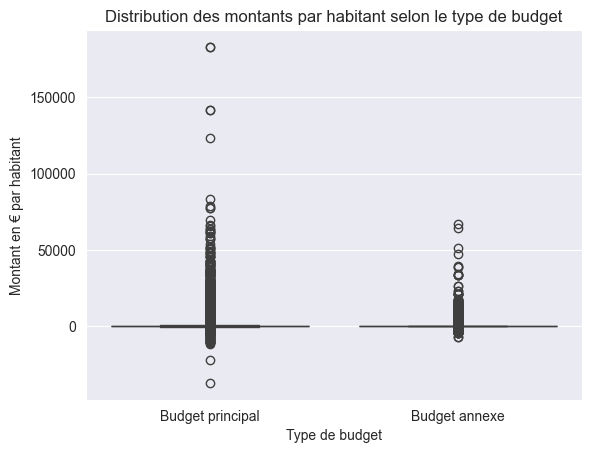

In [66]:
sns.boxplot(data=communes, x="Type de budget", y="Montant en € par habitant")
plt.ylabel("Montant en € par habitant")
plt.title("Distribution des montants par habitant selon le type de budget")
plt.show()


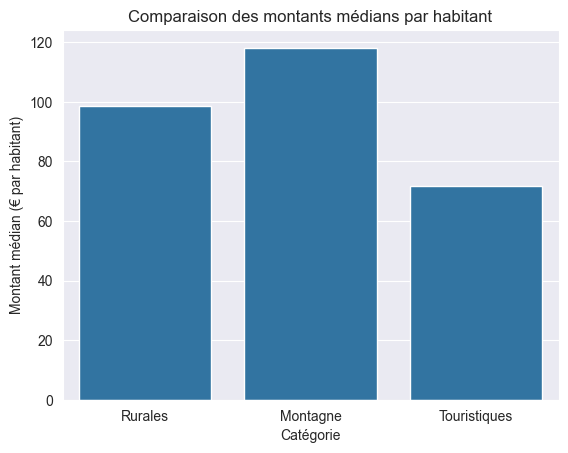

In [72]:
df_clean = communes[communes["Montant en € par habitant"] > 0]


df_rurales = df_clean[df_clean["Commune rurale"]=="Oui"]
df_montagne = df_clean[df_clean["Commune de montagne"]=="Oui"]
df_touristique = df_clean[df_clean["Commune touristique"]=="Oui"]

med_rurales = df_rurales["Montant en € par habitant"].median()
med_montagne = df_montagne["Montant en € par habitant"].median()
med_touristique = df_touristique["Montant en € par habitant"].median()


df_med = pd.DataFrame({
    "Catégorie": ["Rurales", "Montagne", "Touristiques"],
    "Médiane par habitant": [med_rurales, med_montagne, med_touristique]
})

sns.barplot(data=df_med, x="Catégorie", y="Médiane par habitant")

plt.ylabel("Montant médian (€ par habitant)")
plt.title("Comparaison des montants médians par habitant")
plt.show()

In [120]:
df_clean = communes[communes["Montant en € par habitant"] != 0]

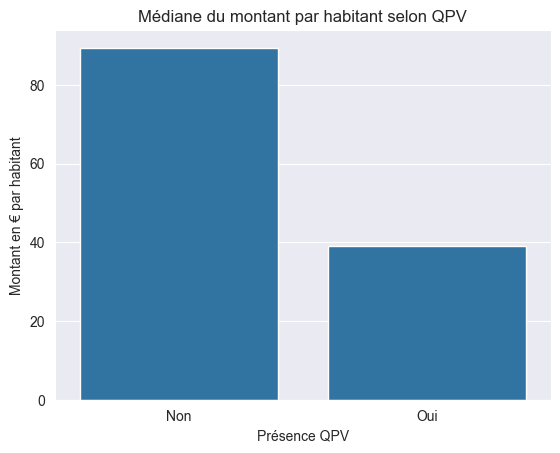

In [108]:
medians_qpv = df_clean.groupby("Présence QPV")["Montant en € par habitant"].median().reset_index()

sns.barplot(data=medians_qpv, x="Présence QPV", y="Montant en € par habitant")
plt.title("Médiane du montant par habitant selon QPV")
plt.show()


On regroupe par commune pour une meilleure analyse.

In [121]:
communes_grouped = df_clean.groupby("Nom 2024 Commune")["Montant en € par habitant"].median().reset_index()

In [122]:
# Description complète
communes_grouped["Montant en € par habitant"].describe()

count    32680.000000
mean       111.717066
std        111.763378
min          0.263343
25%         58.207227
50%         90.651837
75%        133.834650
max       4719.120000
Name: Montant en € par habitant, dtype: float64

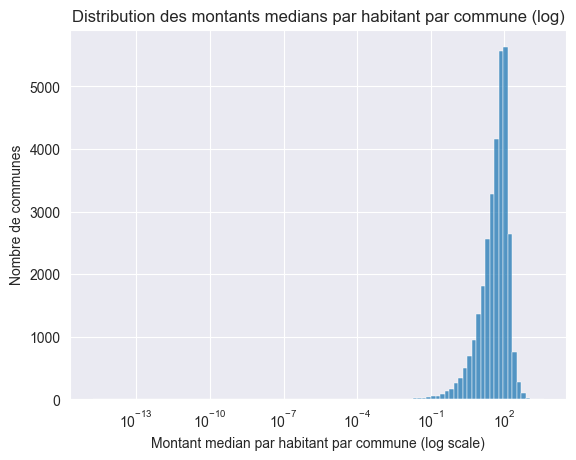

In [110]:
communes_grouped = communes.groupby("Nom 2024 Commune")["Montant en € par habitant"].median().reset_index()

sns.histplot(communes_grouped["Montant en € par habitant"], bins=100, log_scale=True)
plt.xlabel("Montant median par habitant par commune (log scale)")
plt.ylabel("Nombre de communes")
plt.title("Distribution des montants medians par habitant par commune (log)")
plt.show()

Outliers

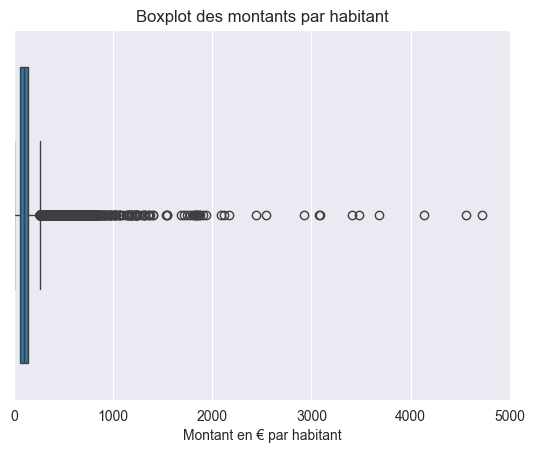

In [102]:
sns.boxplot(x=communes_grouped["Montant en € par habitant"])
plt.xlabel("Montant en € par habitant")
plt.title("Boxplot des montants par habitant")
plt.xlim(0, 5000)
plt.show()


In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrer les lignes avec un montant par habitant négatif
negatifs = communes[communes["Montant en € par habitant"] < 0]
negatifs.head(2000)

,Exercice,Outre-mer,Code Insee 2024 Région,Nom 2024 Région,Code Insee 2024 Département,Nom 2024 Département,Code Siren 2024 EPCI,Nom 2024 EPCI,Strate population 2024,Commune rurale,...,Montant,Montant en millions,Population totale,Montant en € par habitant,Compte 2024 Disponible,code_type_budget,annee_join,Population totale du dernier exercice,type,zscore_montant_hab
788,2017,Non,75,Nouvelle-Aquitaine,19,Corrèze,200066769,Communauté de communes Midi Corrézien,2,Oui,...,-4785.92,-0.004786,221,-21.655747,1,1,2017,228,commune,-0.088057
8664,2017,Non,24,Centre-Val de Loire,28,Eure-et-Loir,242852465,Communauté de communes du Bonnevalais,3,Oui,...,-68441.36,-0.068441,858,-79.768485,1,1,2017,756,commune,-0.188912
12221,2017,Non,76,Occitanie,32,Gers,243200599,Communauté de communes du Saves,1,Oui,...,-1841.75,-0.001842,165,-11.162121,1,1,2017,146,commune,-0.069845
16774,2017,Non,84,Auvergne-Rhône-Alpes,38,Isère,200070431,Communauté de communes Saint-Marcellin Vercors...,0,Oui,...,-9494.20,-0.009494,53,-179.135849,1,1,2017,57,commune,-0.361365
17699,2017,Non,27,Bourgogne-Franche-Comté,39,Jura,200071595,"Communauté de communes Arbois,Poligny,Salins,C...",1,Oui,...,-1241.49,-0.001241,133,-9.334511,1,1,2017,141,commune,-0.066674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129852,2017,Non,84,Auvergne-Rhône-Alpes,07,Ardèche,200073245,Communauté de communes du Bassin d'Aubenas,4,Oui,...,-52030.24,-0.052030,1876,-27.734670,1,3,2017,2094,commune,-0.098607
129853,2017,Non,84,Auvergne-Rhône-Alpes,07,Ardèche,200071413,Communauté d'agglomération Privas Centre Ardèche,3,Non,...,-447634.32,-0.447634,1603,-279.247860,1,1,2017,1555,commune,-0.535110
129854,2017,Non,84,Auvergne-Rhône-Alpes,07,Ardèche,240700815,Communauté de communes Berg et Coiron,4,Non,...,-106452.15,-0.106452,3060,-34.788284,1,1,2017,3137,commune,-0.110849
129857,2017,Non,84,Auvergne-Rhône-Alpes,07,Ardèche,240700815,Communauté de communes Berg et Coiron,4,Non,...,-16726.10,-0.016726,3060,-5.466046,1,3,2017,3137,commune,-0.059960
